In [2]:
import pandas as pd
#Reading the dataset'
data =pd.read_csv(r'ev stations.csv')
print(data.to_string())

                                                                            Station Name                   Street Address                City                                                                                                                                   Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num EV DC Fast Count       EV Other Info                    New Georeferenced Column
0                                                                          BMW OF DARIEN                 138-142 Ledge Rd              Darien                                                                                                                                     24 hours daily               NONE                  2             NONE                NONE               POINT (-73.4764687 41.072882)
1                                                           Dunkin’ - Tesla Supercharger                    893 E Main St             Meriden                                           

In [3]:
#Renaming the column headers by removing the  whitespace
data.columns=['Station_Name','Street_Address','City','Access_Days_Time','EV_Level1_EVSE_Num','EV_Level2_EVSE_Num','EV_DC_Fast_count','EV_other_Info','New_Georeferenced_column']
#print(data.head())
print(data)

                                          Station_Name  \
0                                        BMW OF DARIEN   
1                         Dunkin’ - Tesla Supercharger   
2                  Town of Beacon Falls - Commuter Lot   
3                                      OLD SAYBROOK VW   
4                               Fairfield Rail Station   
..                                                 ...   
380                  Lee Partyka Chevrolet Mazda Isuzu   
381                                        777 MAIN ST   
382                           Norwich Public Utilities   
383                                    Fairfield Plaza   
384  Eastern Connecticut State University - Shakesp...   

             Street_Address          City                    Access_Days_Time  \
0          138-142 Ledge Rd        Darien                      24 hours daily   
1             893 E Main St       Meriden  24 hours daily; for Tesla use only   
2             105 N Main St  Beacon Falls                   

In [4]:
# checking for the datatypes for the data set
print(data.dtypes)

Station_Name                object
Street_Address              object
City                        object
Access_Days_Time            object
EV_Level1_EVSE_Num          object
EV_Level2_EVSE_Num          object
EV_DC_Fast_count            object
EV_other_Info               object
New_Georeferenced_column    object
dtype: object


In [5]:
# checking for duplicates in the DataFrame

duplicates = data.duplicated()
print(duplicates.sum())

0


In [6]:
#printing the percentage of missing values in the DataFrame

missing_percentage = data.isnull().sum() / len(data)* 100
print(missing_percentage)

Station_Name                0.0
Street_Address              0.0
City                        0.0
Access_Days_Time            0.0
EV_Level1_EVSE_Num          0.0
EV_Level2_EVSE_Num          0.0
EV_DC_Fast_count            0.0
EV_other_Info               0.0
New_Georeferenced_column    0.0
dtype: float64


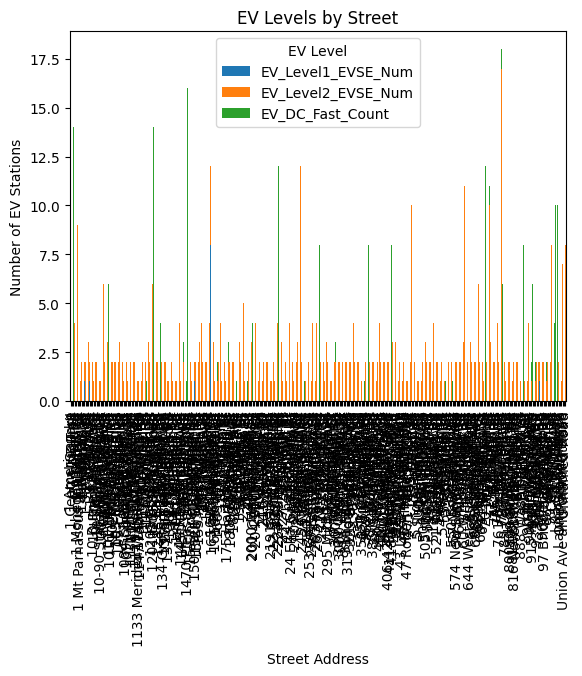

In [7]:
#import pandas as pd
import matplotlib.pyplot as plt

# # Load the dataset
# file_path = 'path_to_your_file/ev_stations.csv'
# data = pd.read_csv(file_path)

# Renaming the column headers by removing the whitespace
data.columns = [
    'Station_Name',
    'Street_Address',
    'City',
    'Access_Days_Time',
    'EV_Level1_EVSE_Num',
    'EV_Level2_EVSE_Num',
    'EV_DC_Fast_Count',
    'EV_other_Info',
    'New_Georeferenced_column'
]

# Define the columns to replace 'none' with 0
columns_to_replace = ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']

# Replace 'none' and 'NONE' with 0 in the specified columns
for col in columns_to_replace:
    data[col] = data[col].str.lower().replace('none', 0).astype(int)

# Aggregate the data: count occurrences of each level per street
agg_data = data.groupby('Street_Address')[columns_to_replace].sum().reset_index()

# Plot the bar graph
agg_data.plot(kind='bar', x='Street_Address', stacked=True)
plt.xlabel('Street Address')
plt.ylabel('Number of EV Stations')
plt.title('EV Levels by Street')
plt.legend(title='EV Level')
plt.show()


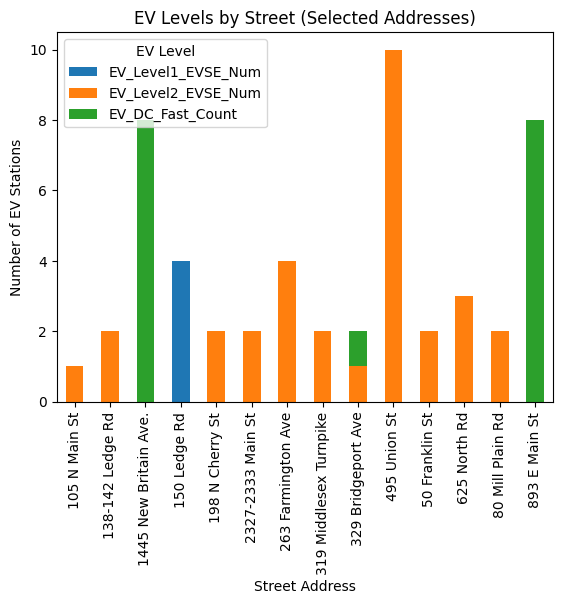

In [8]:
import matplotlib.pyplot as plt

# # Load the dataset
# file_path = '/mnt/data/ev_stations.csv'
# data = pd.read_csv(file_path)

# Renaming the column headers by removing the whitespace
data.columns = [
    'Station_Name',
    'Street_Address',
    'City',
    'Access_Days_Time',
    'EV_Level1_EVSE_Num',
    'EV_Level2_EVSE_Num',
    'EV_DC_Fast_Count',
    'EV_other_Info',
    'New_Georeferenced_column'
]

# Define the columns to replace 'none' with 0
columns_to_replace = ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']

# Replace 'none' and 'NONE' with 0 in the specified columns
for col in columns_to_replace:
    data[col] = data[col].astype(str).str.lower().replace('none', '0').astype(int)

# Aggregate the data: count occurrences of each level per street
agg_data = data.groupby('Street_Address')[columns_to_replace].sum().reset_index()

# Select only the first fifteen addresses from the list you provided
selected_addresses = [
    '138-142 Ledge Rd',
    '893 E Main St',
    '105 N Main St',
    '319 Middlesex Turnpike',
    '80 Mill Plain Rd',
    '50 Franklin St',
    '1445 New Britain Ave.',
    '2327-2333 Main St',
    '150 Ledge Rd',
    '625 North Rd',
    '495 Union St',
    '263 Farmington Ave',
    '329 Bridgeport Ave',
    '198 N Cherry St'
]

# Filter the aggregated data for the selected addresses
agg_data = agg_data[agg_data['Street_Address'].isin(selected_addresses)]

# Plot the bar graph
agg_data.plot(kind='bar', x='Street_Address', stacked=True)
plt.xlabel('Street Address')
plt.ylabel('Number of EV Stations')
plt.title('EV Levels by Street (Selected Addresses)')
plt.legend(title='EV Level')
plt.show()

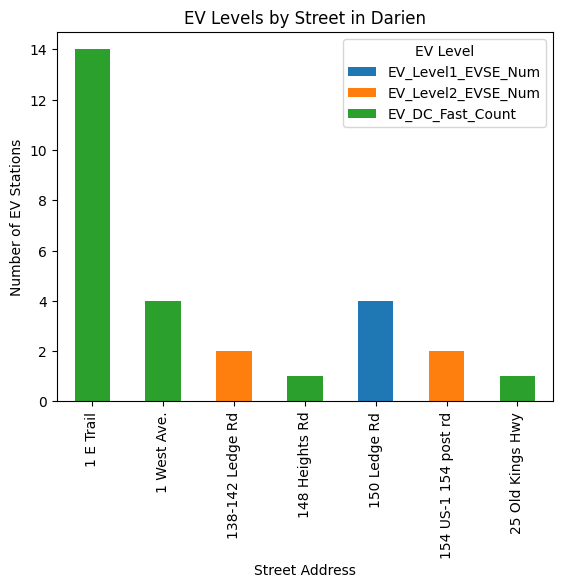

In [9]:
#To predict the nearest levels to charge from a certain city
import pandas as pd
import matplotlib.pyplot as plt

# Function to get the nearest charging stations for a specified city
def get_nearest_charging_stations(city):
    # Filter the data based on the city
    city_data = data[data['City'].str.contains(city, case=False, na=False)]
    
    if city_data.empty:
        print(f"No data available for the city: {city}")
        return None
    
    # Aggregate the data: sum occurrences of each level per street
    agg_data = city_data.groupby('Street_Address')[columns_to_replace].sum().reset_index()

    return agg_data

# Example 
city = "Darien"  
nearest_stations = get_nearest_charging_stations(city)

if nearest_stations is not None:
    # Plot the bar graph for the nearest stations in the specified city
    nearest_stations.plot(kind='bar', x='Street_Address', stacked=True)
    plt.xlabel('Street Address')
    plt.ylabel('Number of EV Stations')
    plt.title(f'EV Levels by Street in {city}')
    plt.legend(title='EV Level')
    plt.show()

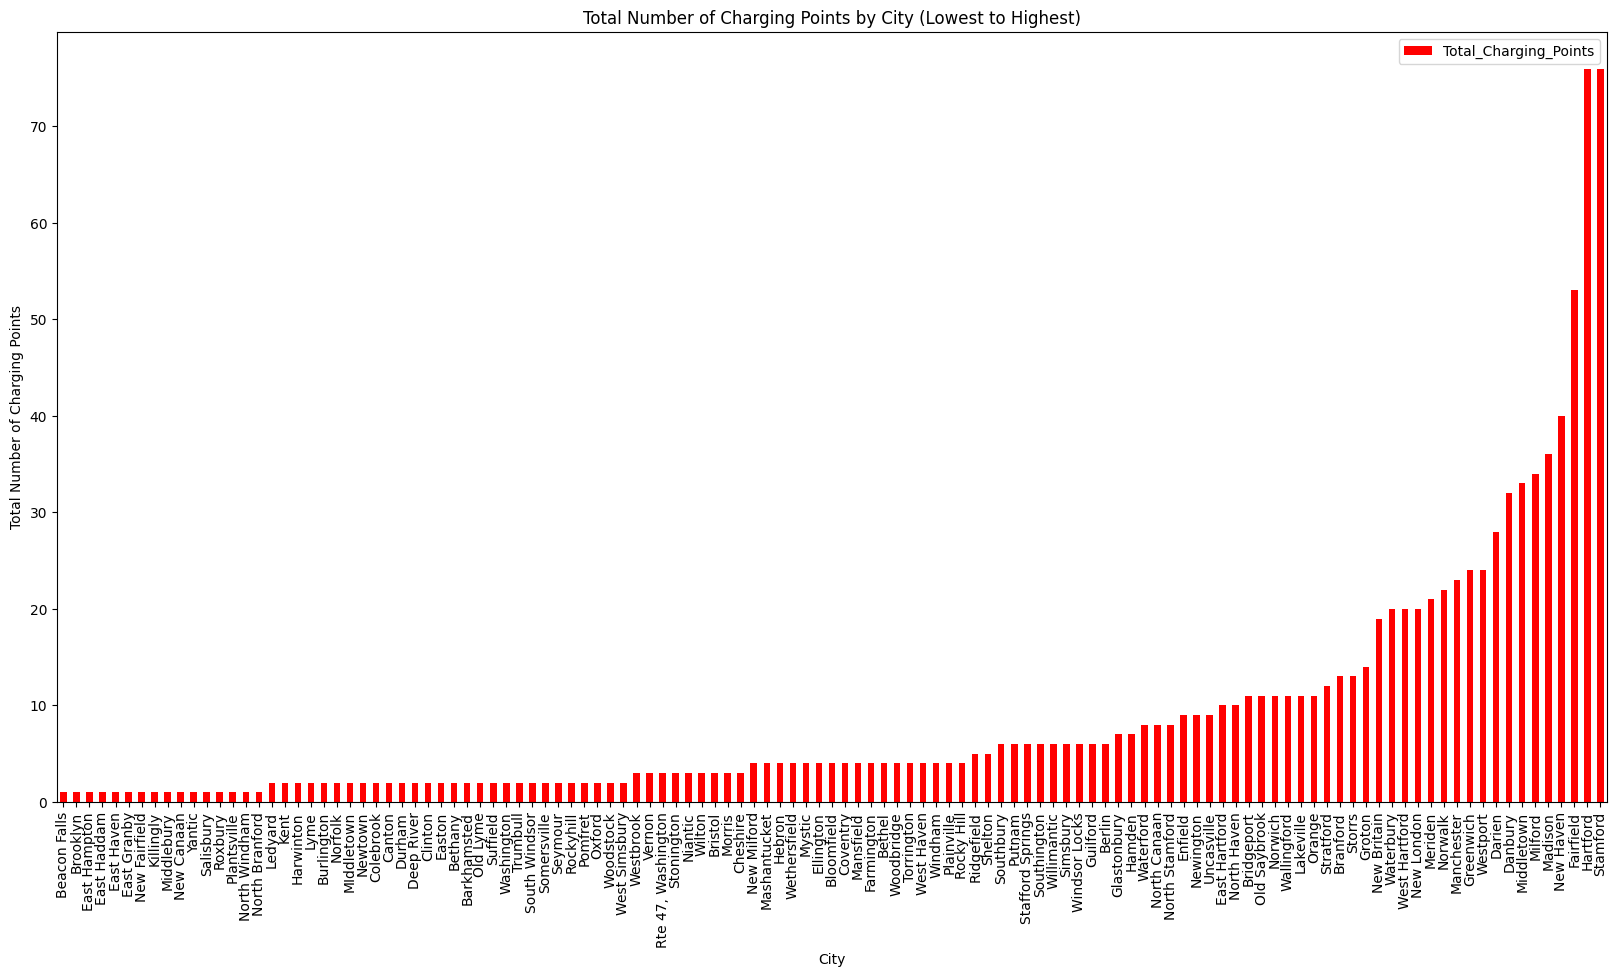

In [28]:
# #  identify cities where it might be more difficult to find 
# # a charging point based on the number of available charging points.
 
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt



# Replace 'NONE' with 0 and convert to integer
columns_to_replace = ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']
for col in columns_to_replace:
    data[col] = data[col].replace('NONE', 0).astype(int)

# Aggregate the data: sum occurrences of each level per city
agg_data_city = data.groupby('City')[columns_to_replace].sum().reset_index()

# Calculate the total number of charging points per city
agg_data_city['Total_Charging_Points'] = agg_data_city[columns_to_replace].sum(axis=1)

# Rank the cities based on the total number of charging points
agg_data_city = agg_data_city.sort_values(by='Total_Charging_Points', ascending=True)

# Plot the data to show cities with the least number of charging points
agg_data_city.plot(kind='bar', x='City', y='Total_Charging_Points', figsize=(20, 10), color='red')
plt.xlabel('City')
plt.ylabel('Total Number of Charging Points')
plt.title('Total Number of Charging Points by City (Lowest to Highest)')
plt.show()
